## Занятие 6
## Математический анализ
## Дифференцирование

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import diff, solve, nsolve, solveset, latex, S, simplify, fraction
from sympy import sin as Sin
from sympy.calculus.util import continuous_domain
%matplotlib inline

## Лабораторная работа 6
## Математический анализ
## Задание 1
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду. 
$$
y = x^2e^{-x}
$$

Область определения:  Reals
Четность :  Функция общего вида
Период:  None
Точки пересечения с осями:  [0]
Точки максимума:  [2]
Точки минимума:  [0]
Точки перегиба:  [2 - sqrt(2), sqrt(2) + 2]
Асимптоты: 
  y=0:  0


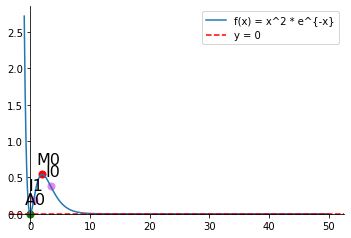

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import diff, solve, nsolve, solveset, latex, S, simplify, fraction ,exp, oo
from sympy import sin as Sin
from sympy.calculus.util import continuous_domain
from sympy.abc import x
%matplotlib inline

def parity(f):
    if f(-x) == f(x):
        return 'Четная функция'
    elif f(-x) == -f(x):
        return 'Нечетная функция'
    else:
        return 'Функция общего вида'

def extremum_points(f):
    df = f(x).diff(x)
    df_roots = solve(df, x)
    #display(df_roots)
    points = [df_roots[0]-1 ]
    points.extend([(df_roots[i] + df_roots[i + 1])/2 for i in range(len(df_roots)-1)]) 
    points.append(df_roots[-1] + 1)
    #display(points)
    max_arr=[]
    min_arr=[]
    for i, item in enumerate(df_roots):
        df_left = df.subs(x, points[i]) 
        df_right = df.subs(x, points[i + 1]) 
        if df_left < 0 and df_right > 0:
            min_arr.append(item)
        elif df_left > 0 and df_right < 0:
            max_arr.append(item)
    return max_arr,min_arr;
    #display(max_arr, min_arr)
    
def inflection_points(f):
    df2 = f(x).diff(x, 2)
    df2_roots = solve(df2, x)
    df2_roots.sort() # Упорядочили корни по возрастанию
    #display(df2_roots)
    if(df2_roots):
        points2 = [df2_roots[0]-1 ]
        points2.extend([(df2_roots[i] + df2_roots[i + 1])/2 for i in range(len(df2_roots)-1)])
        points2.append(df2_roots[-1] + 1)
        inflection_arr = [item for i, item in enumerate(df2_roots) 
                              if df2.subs(x, points2[i])*df2.subs(x, points2[i + 1]) < 0] 
        return inflection_arr
    else: 
        return None
    #display(inflection_arr)
    
def f(x):
    return (x**2*exp(-x))

D = continuous_domain(f(x), x, S.Reals) # область определения
print("Область определения: ",D)
P = parity(f) # четность 
print("Четность : ",P)
T = None # периодичность 
print("Период: ", T)
roots = list(solveset(f(x), domain=D)) # точки пересечения с осями
print("Точки пересечения с осями: ", roots)
dD = continuous_domain(f(x).diff(x), x, S.Reals) # область определения производной
maxPoints, minPoints = extremum_points(f) # классифицированные точки экстремума
print("Точки максимума: ", maxPoints)
print("Точки минимума: ", minPoints)
infPoints = inflection_points(f) # точки перегеиба
print("Точки перегиба: ", infPoints)

#асимптоты
print("Асимптоты: ")
# вертикальных асимптот нет 
# наклонных асимптот нет
# горизонтальная асимптота y = 0
print("  y=0: ",f(x).limit(x, oo))

#график
ax = plt.gca()
X = np.linspace(-1, 50, 1000)
X_D = [x for x in X if x in D]
Y_D = [f(x) for x in X if x in D]
ax.plot(X_D, Y_D,label='f(x) = x^2 * e^{-x}')
ax.axhline(y=0, color='red', linestyle='--',
            label='y = 0') # График горизонтальной асимптоты
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none') 
ax.spines['bottom'].set_position(('data', 0)) 
ax.spines['left'].set_position(('data', 0))

#подписи точек
def ScatterPoints(points,letter,color):
    if points:
        points_y = [(f(point)) for point in points]
        for i in range(len(points)):
            ax.annotate(letter+str(i), xy=(points[i].evalf()-0.1, points_y[i].evalf()), xycoords='data',
                    xytext=(-5, 10), textcoords='offset points', fontsize=16)
        ax.scatter(points, points_y , 50, color=color)
#корни
ScatterPoints(roots, 'A','green')
#точки минимума
ScatterPoints(list(set(minPoints) - set(roots)), 'm','red')
#точки максимума
ScatterPoints(list(set(maxPoints) - set(roots)), 'M','red')
#точки перегиба

ScatterPoints(list(set(infPoints) - set(roots)), 'I','violet')
ax.legend()

## Задание 2
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду. 
$$
y=xe^{2/x} + 1 
$$

Область определения:  Union(Interval.open(-oo, 0), Interval.open(0, oo))


Четность :  Функция общего вида
Период:  None
Точки пересечения с осями:  [-2.34575075492277]
Точки максимума:  []
Точки минимума:  [2]
Точки перегиба:  None
Асимптоты: 
  y = x + 3:
	k =  1
	b =  3
  x=0:  -: 1 +: oo


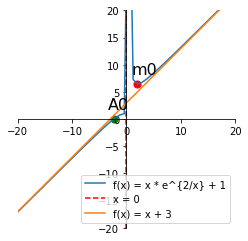

In [150]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import diff, solve, nsolve, solveset, latex, S, simplify, fraction ,exp, oo
from sympy import sin as Sin
from sympy.calculus.util import continuous_domain
from sympy.abc import x
%matplotlib inline

def parity(f):
    if f(-x) == f(x):
        return 'Четная функция'
    elif f(-x) == -f(x):
        return 'Нечетная функция'
    else:
        return 'Функция общего вида'

def extremum_points(f):
    df = f(x).diff(x)
    df_roots = solve(df, x)
    #display(df_roots)
    points = [df_roots[0]-1 ]
    points.extend([(df_roots[i] + df_roots[i + 1])/2 for i in range(len(df_roots)-1)]) 
    points.append(df_roots[-1] + 1)
    #display(points)
    max_arr=[]
    min_arr=[]
    for i, item in enumerate(df_roots):
        df_left = df.subs(x, points[i]) 
        df_right = df.subs(x, points[i + 1]) 
        if df_left < 0 and df_right > 0:
            min_arr.append(item)
        elif df_left > 0 and df_right < 0:
            max_arr.append(item)
    return max_arr,min_arr;
    #display(max_arr, min_arr)
    
def inflection_points(f):
    df2 = f(x).diff(x, 2)
    df2_roots = solve(df2, x)
    df2_roots.sort() # Упорядочили корни по возрастанию
    #display(df2_roots)
    if(df2_roots):
        points2 = [df2_roots[0]-1 ]
        points2.extend([(df2_roots[i] + df2_roots[i + 1])/2 for i in range(len(df2_roots)-1)])
        points2.append(df2_roots[-1] + 1)
        inflection_arr = [item for i, item in enumerate(df2_roots) 
                              if df2.subs(x, points2[i])*df2.subs(x, points2[i + 1]) < 0] 
        return inflection_arr
    else: 
        return None
    #display(inflection_arr)
    
def f(x):
    return (x*exp(2/x) + 1)

display(f(x))

D = continuous_domain(f(x), x, S.Reals) # область определения
print("Область определения: ",D)
display(D)
P = parity(f) # четность 
print("Четность : ",P)
T = None # периодичность 
print("Период: ", T)
roots = list(set([nsolve(f(x),i,domain = D) for i in np.arange(-4,0,0.5)])) # точки пересечения с осями
# объяснение:
# x*e^(2/x) = -1
# если корень есть, то он отрицательный, т.к. е^k > 0 
# если корень есть, то он не меньше -4 
# т.к. если идти дальше в минус, то число k/e^(2/k) 
# станет по модулю >> 1
# в качестве начальных приближений возьмем все точки от -4 до 0 с шагом 0.5
# выведем уникальные корни
print("Точки пересечения с осями: ", roots)
dD = continuous_domain(f(x).diff(x), x, S.Reals) # область определения производной
maxPoints, minPoints = extremum_points(f) # классифицированные точки экстремума
print("Точки максимума: ", maxPoints)
print("Точки минимума: ", minPoints)
infPoints = inflection_points(f) # точки перегеиба
print("Точки перегиба: ", infPoints)

#асимптоты
print("Асимптоты: ")
# горизонтальных асимптот нет 
# наклонные:
print("  y = x + 3:")
k = limit(f(x)/x,x,oo)
print("\tk = ", k)
b = limit(f(x)-k*x,x,oo)
print("\tb = ", b)

# вертикальная асимптота y = 0
print("  x=0: ","-:",limit(f(x),x,0, dir = "-"), "+:",limit(f(x),x,0))


#график
ax = plt.gca()
ax.set_ylim(-20, 20)
ax.set_xlim(-20, 20)
ax.set_aspect('equal')
X = np.linspace(-20, 20, 50)
X_D = [x for x in X if x in D]
Y_D = [f(x) for x in X if x in D]
ax.plot(X_D, Y_D,label='f(x) = x * e^{2/x} + 1')

# вертикальная асимптота
ax.axvline(x=0, color='red', linestyle='--',
            label='x = 0') 
# наклонная асимптота
ax.plot(X_D,[x + 3 for x in X],label='f(x) = x + 3' )

ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none') 
ax.spines['bottom'].set_position(('data', 0)) 
ax.spines['left'].set_position(('data', 0))

#подписи точек
def ScatterPoints(points,letter,color):
    if points:
        points_y = [(f(point)) for point in points]
        for i in range(len(points)):
            ax.annotate(letter+str(i), xy=(points[i].evalf()-0.1, points_y[i].evalf()), xycoords='data',
                    xytext=(-5, 10), textcoords='offset points', fontsize=16)
        ax.scatter(points, points_y , 50, color=color)
#корни
ScatterPoints(roots, 'A','green')
#точки минимума
ScatterPoints(list(set(minPoints) - set(roots)), 'm','red')
#точки максимума
ScatterPoints(list(set(maxPoints) - set(roots)), 'M','red')
#точки перегиба
#ScatterPoints(list(set(infPoints) - set(roots)), 'I','violet') - их нет
ax.legend()


## Индивидуальное задание
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот (если есть), отметить и подписать точки экстремума и точки перегиба (если есть),
включить функцию и асимптоты (если есть) в легенду. 

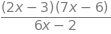

Область определения:  Union(Interval.open(-oo, 1/3), Interval.open(1/3, oo))


Четность :  Функция общего вида
Период:  None
Точки пересечения с осями:  [6/7, 3/2]
Точки максимума:  [1/3 - sqrt(22)/6]
Точки минимума:  [1/3 + sqrt(22)/6]
Точки перегиба:  None
Асимптоты: 
  y = 7/3 * x  - 85/18:
	k =  7/3
	b =  -85/18
 x=1/3:  -: -oo +: oo


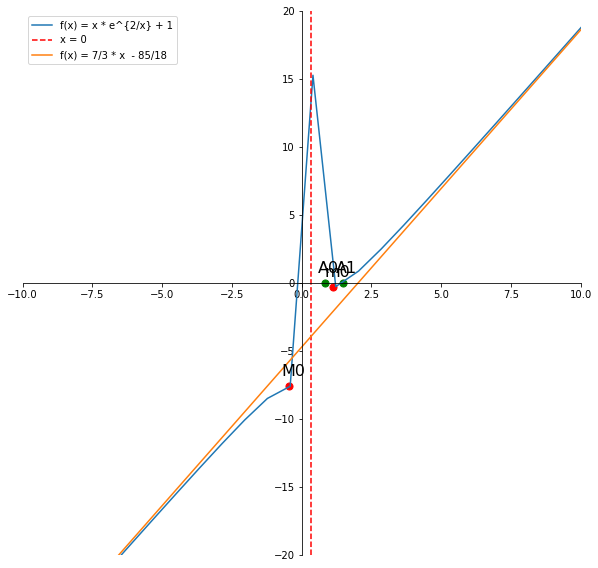

In [174]:
# 143
# чтобы не было убогой линии, соединяющей точки по разные стороны от разрыва надо бить функцию на 2, а мне так лень
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import diff, solve, nsolve, solveset, latex, S, simplify, fraction ,exp, oo
from sympy import sin as Sin
from sympy.calculus.util import continuous_domain
from sympy.abc import x
%matplotlib inline

def parity(f):
    if f(-x) == f(x):
        return 'Четная функция'
    elif f(-x) == -f(x):
        return 'Нечетная функция'
    else:
        return 'Функция общего вида'

def extremum_points(f):
    df = f(x).diff(x)
    df_roots = solve(df, x)
    points = [df_roots[0]-0.9]
    points.extend([(df_roots[i] + df_roots[i + 1])/2 + 0.1 for i in range(len(df_roots)-1)]) 
    points.append(df_roots[-1] + 1.1)
    max_arr=[]
    min_arr=[]
    for i, item in enumerate(df_roots):
        df_left = df.subs(x, points[i]) 
        df_right = df.subs(x, points[i + 1]) 
        if df_left < 0 and df_right > 0:
            min_arr.append(item)
        elif df_left > 0 and df_right < 0:
            max_arr.append(item)
    return max_arr,min_arr;
    #display(max_arr, min_arr)
    
def inflection_points(f):
    df2 = f(x).diff(x, 2)
    df2_roots = solve(df2, x)
    df2_roots.sort() # Упорядочили корни по возрастанию
    #display(df2_roots)
    if(df2_roots):
        points2 = [df2_roots[0]-1 ]
        points2.extend([(df2_roots[i] + df2_roots[i + 1])/2 for i in range(len(df2_roots)-1)])
        points2.append(df2_roots[-1] + 1)
        inflection_arr = [item for i, item in enumerate(df2_roots) 
                              if df2.subs(x, points2[i])*df2.subs(x, points2[i + 1]) < 0] 
        return inflection_arr
    else: 
        return None
    #display(inflection_arr)
    
def f(x):
    return (2*x-3)*(7*x-6)/(6*x - 2)

display(f(x))

D = continuous_domain(f(x), x, S.Reals) # область определения
print("Область определения: ",D)
display(D)
P = parity(f) # четность 
print("Четность : ",P)
T = None # периодичность 
print("Период: ", T)
roots = list(solveset(f(x), domain=D)) # точки пересечения с осями
print("Точки пересечения с осями: ", roots)
dD = continuous_domain(f(x).diff(x), x, S.Reals) # область определения производной
maxPoints, minPoints = extremum_points(f) # классифицированные точки экстремума
print("Точки максимума: ", maxPoints)
print("Точки минимума: ", minPoints)
infPoints = inflection_points(f) # точки перегеиба
print("Точки перегиба: ", infPoints)

#асимптоты
print("Асимптоты: ")
# горизонтальных асимптот нет 
# наклонные:
print("  y = 7/3 * x  - 85/18:")
k = limit(f(x)/x,x,oo)
print("\tk = ", k)
b = limit(f(x)-k*x,x,oo)
print("\tb = ", b)

# вертикальная асимптота y = 0
print(" x=1/3: ","-:",limit(f(x),x,1/3, dir = "-"), "+:",limit(f(x),x,1/3))


#график
plt.figure(figsize=(10, 10))
ax = plt.gca()
ax.set_ylim(-20, 20)
ax.set_xlim(-10, 10)

X = np.linspace(-20, 20, 50)
X_D = [x for x in X if x in D]
Y_D = [f(x) for x in X if x in D]
ax.plot(X_D, Y_D,label='f(x) = x * e^{2/x} + 1')

# вертикальная асимптота
ax.axvline(x=1/3, color='red', linestyle='--',
            label='x = 0') 
# наклонная асимптота
ax.plot(X_D,[7/3 * x - 85/18 for x in X],label='f(x) = 7/3 * x  - 85/18' )

ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none') 
ax.spines['bottom'].set_position(('data', 0)) 
ax.spines['left'].set_position(('data', 0))

#подписи точек
def ScatterPoints(points,letter,color):
    if points:
        points_y = [(f(point)) for point in points]
        for i in range(len(points)):
            ax.annotate(letter+str(i), xy=(points[i].evalf()-0.1, points_y[i].evalf()), xycoords='data',
                    xytext=(-5, 10), textcoords='offset points', fontsize=16)
        ax.scatter(points, points_y , 50, color=color)
#корни
ScatterPoints(roots, 'A','green')
#точки минимума
ScatterPoints(list(set(minPoints) - set(roots)), 'm','red')
#точки максимума
ScatterPoints(list(set(maxPoints) - set(roots)), 'M','red')
#точки перегиба
#ScatterPoints(list(set(infPoints) - set(roots)), 'I','violet') - их нет
ax.legend()